In [1]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso 
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap,prepare_data_to_predict
from regain.hmm.utils import cross_validation,spread_pred_interpretation
import pickle as pkl
from notebooks.hmm.pred_func import pred_lgb, pred_LSTM, pred_VAR_VARMA, pred_Kernel_Ridge,pred_HMM_GMM
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [11]:
N_samples = 1000
N_states = 10
N_TS = 2
sigma_Normal = 0.5

dataset = generate_hmm(n_samples= N_samples,
                       n_states=N_states,
                       n_dim_obs=N_TS,
                       mode_precisions='regain',
                       mode_mean = 'Uniform',
                       transition_type='fixed',
                       sigma=sigma_Normal)
N_pred = 3

In [12]:
print(dataset['data'])

[[ 5.14268916  2.07999717]
 [ 2.65589643  5.88708791]
 [ 3.17187119  4.91420649]
 ...
 [ 5.42676984  2.47811165]
 [ 2.97450665  1.17627237]
 [-0.13402728  4.49417071]]


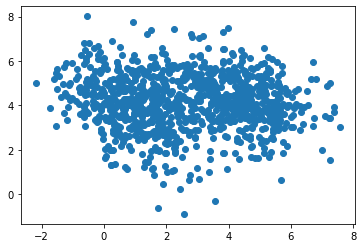

In [13]:
plt.plot(dataset['data'][:,0],dataset['data'][:,1],'o')

In [10]:
X, MultiY = prepare_data_to_predict(dataset['data'], 2)
Y_real = MultiY[(np.size(X,axis=0) - N_pred):,:]

In [14]:
results = pred_HMM_GMM(dataset['data'],dataset=dataset,K=N_states,N_test = N_pred, meth = 'viterbi')

  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [4]:
print(results)

[array([[ 0.69155137, -0.30451137, -1.12147278,  0.41634889, -1.52623025]]), array([[-0.8258507 ,  0.82761099, -2.34959432,  1.21414008,  0.71215343]]), array([[-0.32710377, -0.37848951,  1.10815592,  2.29523135, -1.66304589]]), {'0': array([[ 1.12377771e+00, -9.15744509e-02, -1.12220261e-01,
        -7.82068018e-04, -2.00539112e-03],
       [-9.15744509e-02,  1.04395328e+00, -8.57042207e-02,
         2.29870232e-02, -4.09184226e-02],
       [-1.12220261e-01, -8.57042207e-02,  1.15016653e+00,
        -1.36711779e-02,  5.67714938e-02],
       [-7.82068018e-04,  2.29870232e-02, -1.36711779e-02,
         1.05297361e+00, -2.73856073e-01],
       [-2.00539112e-03, -4.09184226e-02,  5.67714938e-02,
        -2.73856073e-01,  1.23879833e+00]])}, {'0': array([[ 0.90645163,  0.08730771,  0.09494701,  0.        ,  0.        ],
       [ 0.08730771,  0.97339528,  0.07962368, -0.01347618,  0.02566519],
       [ 0.09494701,  0.07962368,  0.8865042 , -0.        , -0.03784287],
       [ 0.        , -0.

In [13]:
import pickle
with open('Res_exp_pred2.pickle', 'wb') as f:
    pickle.dump([results], f)

In [2]:
import pickle
with open('Res_exp_pred2.pickle', 'rb') as f:
   [results] =  pickle.load(f)

In [16]:
results[9]

{'0': array([[1.  , 0.25, 0.25, 0.  , 0.  ],
        [0.25, 1.  , 0.25, 0.  , 0.  ],
        [0.25, 0.25, 1.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 1.  , 0.25],
        [0.  , 0.  , 0.  , 0.25, 1.  ]])}

real 1: -0.41326155848343193 0.11770859486798012 -0.5826245928891582
pred 1: 0.6547964652514389 0.11770859486798012 0.5370878703834587
real 2: -0.1641311757369328 -0.8756045223586016 0.7548620240327695
pred 2: 0.28276240635193417 -0.8756045223586016 1.1583669287105358
real 1: 0.8986646851196545 -0.13599851436942287 1.047466508395707
pred 1: -0.5711184165443546 -0.13599851436942287 -0.4351199021749317
real 2: 0.12884413287309082 -0.8013120033051904 0.9660997401948089
pred 2: -0.25302062973602907 -0.8013120033051904 0.5482913735691612
real 1: 0.5204981569049935 -0.3519647941849562 0.8596818727785287
pred 1: 1.045250885770397 -0.3519647941849562 1.3972156799553532
real 2: -0.5100968581769629 0.44152819263483745 -0.8820975873330019
pred 2: 1.6649991090815544 0.44152819263483745 1.223470916446717
real 1: 0.8939595933246922 1.5575159125532343 -0.7118422083423372
pred 1: 0.5281519395350371 1.5575159125532343 -1.0293639730181972
real 2: -1.4505951692430084 -1.9923499851245554 0.515249514660375

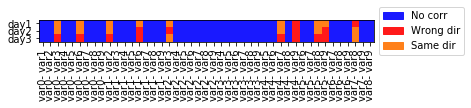

<Figure size 720x720 with 0 Axes>

In [3]:
# Viterbi

df_pred, df_real,df_res, hit_mean, hit_per_spread,tab=spread_pred_interpretation(results[0],
                                                                              results[2],
                                                                              prec = results[4],
                                                                              cov = results[3],
                                                                              means = results[5],
                                                                              prec_real = results[9],
                                                                              cov_real = results[10],
                                                                              means_real = results[11],
                                                                              met_pred = 'hmm_gmm',
                                                                              plot=True)

In [4]:
print(tab)

    Day         1-2  Corr 1-2  Corr 1-2_real     mean1  mean1_real      std1  \
0     1  var0- var3 -0.281088       -0.30303 -1.339262   -1.343676  1.020196   
1     1  var0- var6 -0.200617       -0.30303 -1.339262   -1.343676  1.020196   
2     1  var1- var2 -0.221239       -0.30303 -0.353411   -0.339184  1.069179   
3     1  var1- var6 -0.158856       -0.30303 -0.353411   -0.339184  1.069179   
4     1  var2- var3 -0.175093       -0.30303  1.559544    1.605802  1.045612   
5     1  var4- var7 -0.178274       -0.30303  0.117709    0.169363  1.049092   
6     1  var4- var9 -0.216506       -0.30303  0.117709    0.169363  1.049092   
7     1  var5- var8 -0.243202       -0.30303  1.468737    1.477547  1.050202   
8     1  var5- var9 -0.229182       -0.30303  1.468737    1.477547  1.050202   
9     1  var7- var8 -0.252588       -0.30303 -0.135999   -0.148802  1.047074   
10    2  var0- var3 -0.280027       -0.30303 -1.338199   -1.343676  1.019860   
11    2  var0- var6 -0.201414       -0.3

1
[]
Precision: real 0.0 pred 0.1571555623354792
Covariance: real 0.006379585326953669 pred -0.15258687814753183
Means: real 2.2752239356051445 -0.2376851556193427 pred 0.582138785082857 -1.1408462044552832
Value real : 0.5439863419365552 -1.1708529019477003
Value pred : -0.774555881833093 0.26923030518387403
Precision: real 0.25 pred 0.1592164924810035
Covariance: real -0.3094098883572569 pred -0.1615453276182196
Means: real 2.2752239356051445 0.28790920366121747 pred 0.582138785082857 1.8256341658144768
Value real : 0.5439863419365552 1.718866090972028
Value pred : -0.774555881833093 1.1773643841842145
Precision: real 0.0 pred 0.11665889298172497
Covariance: real -0.022328548644336976 pred -0.14250987893441558
Means: real -0.2376851556193427 0.28790920366121747 pred -1.1408462044552832 1.8256341658144768
Value real : -1.1708529019477003 1.718866090972028
Value pred : 0.26923030518387403 1.1773643841842145
Precision: real 0.0 pred 0.26332204690516525
Covariance: real -0.02232854864433

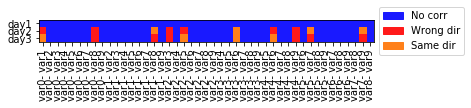

<Figure size 720x720 with 0 Axes>

In [7]:
# Hassan

df_pred, df_real,df_res, hit_mean, hit_per_spread,tab =spread_pred_interpretation(results[1],
                                                                              results[2],
                                                                              prec = results[7],
                                                                              cov = results[6],
                                                                              means = results[8],
                                                                              prec_real = results[9],
                                                                              cov_real = results[10],
                                                                              means_real = results[11],
                                                                              met_pred = 'hmm_gmm',
                                                                              plot=True)

In [8]:
tab

,Day,1-2,Corr 1-2,mean1,std1,mean2,std2
0,2,var0- var1,-0.152587,0.582139,0.974631,-1.140846,1.103321
1,2,var0- var8,-0.161545,0.582139,0.974631,1.825634,1.123336
2,2,var1- var8,-0.142510,-1.140846,1.103321,1.825634,1.123336
3,2,var2- var3,-0.328179,-0.890796,1.058835,0.586871,1.119871
4,2,var2- var5,-0.202672,-0.890796,1.058835,-1.499533,1.093974
5,2,var3- var6,-0.180390,0.586871,1.119871,-1.546489,1.115673
6,2,var4- var6,-0.192158,-0.994897,1.091197,-1.546489,1.115673
7,2,var4- var9,-0.172463,-0.994897,1.091197,-0.297688,0.958355
8,2,var5- var7,-0.197936,-1.499533,1.093974,-3.105412,1.064350
9,2,var7- var9,-0.142872,-3.105412,1.064350,-0.297688,0.958355


In [39]:
from scipy.stats import multivariate_normal
x = np.linspace(0, 5, 10, endpoint=False)
y = np.random.multivariate_normal(mean=[0,0], cov=[[1,-0.9],[-0.9,1]])
print(y)

[-1.34339128  0.84766932]


In [27]:
from scipy import linalg
cov = [[1.3,0,-0.8],[0,1.1,0],[-0.8,0,1.5]]
prec = linalg.pinv(cov)
print(prec)

[[1.14503817 0.         0.61068702]
 [0.         0.90909091 0.        ]
 [0.61068702 0.         0.99236641]]
